In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_excel("C:/ML Course/Datasets/logistic.xlsx")

In [3]:
dataset.head(5)

,age,salary,purchase
0,20,107580,1
1,37,61291,0
2,47,83240,1
3,24,71021,1
4,21,63307,1


In [4]:
dataset.isnull().sum()

age         0
salary      0
purchase    0
dtype: int64

In [5]:
x = dataset.iloc[:,:-1]
y = dataset["purchase"]

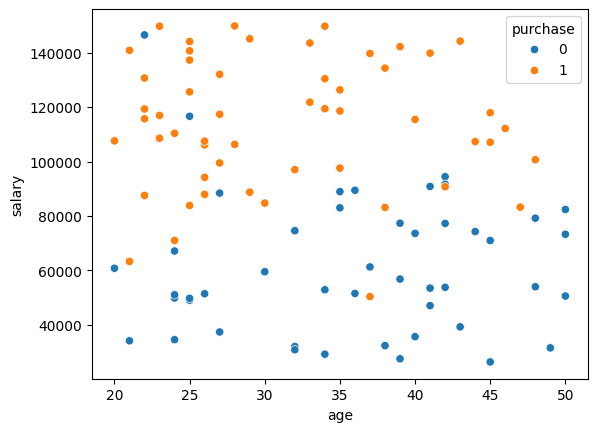

In [6]:
sns.scatterplot(x="age",y="salary",data=dataset, hue="purchase")
plt.show()

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
sc = StandardScaler()
sc.fit(x)
x=pd.DataFrame(sc.transform(x),columns=x.columns)
x

,age,salary
0,-1.550088,0.510974
1,0.414975,-0.782114
2,1.570895,-0.168966
3,-1.087720,-0.510306
4,-1.434496,-0.725797
...,...,...
95,-0.972128,1.530243
96,-0.972128,1.339418
97,-0.972128,-1.104067
98,0.183791,-0.009792


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
knc = KNeighborsClassifier(n_neighbors=6)
knc.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [32]:
knc.score(x_test,y_test)*100

90.0

In [33]:
knc.score(x_train,y_train)*100

90.0

In [37]:
# to find the best neighbors value
for i in range (1, 30):
    knc1 = KNeighborsClassifier(n_neighbors=i)
    knc1.fit(x_train, y_train)
    print(i, knc1.score(x_train,y_train)*100, knc1.score(x_test,y_test)*100)

1 100.0 80.0
2 88.75 75.0
3 90.0 90.0
4 91.25 90.0
5 91.25 90.0
6 90.0 90.0
7 91.25 90.0
8 90.0 90.0
9 91.25 90.0
10 90.0 90.0
11 92.5 90.0
12 91.25 90.0
13 90.0 90.0
14 90.0 90.0
15 87.5 90.0
16 90.0 90.0
17 88.75 90.0
18 88.75 90.0
19 88.75 90.0
20 91.25 90.0
21 91.25 85.0
22 90.0 90.0
23 91.25 90.0
24 90.0 90.0
25 91.25 90.0
26 90.0 90.0
27 88.75 90.0
28 88.75 90.0
29 87.5 90.0


In [41]:
knc.predict([[0.414975,-0.782114]])

C:\python1\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

In [42]:
# to check the decision boundary
from mlxtend.plotting import plot_decision_regions

C:\python1\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


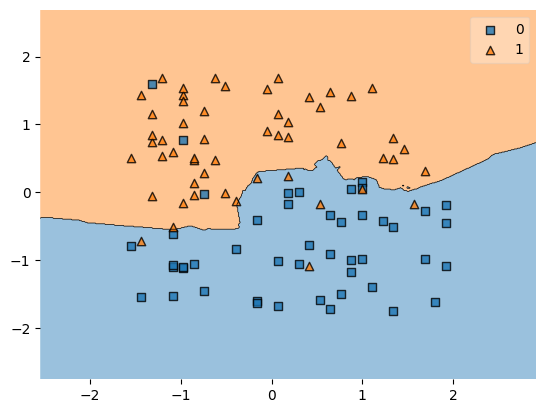

In [43]:
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=knc)
plt.show()

# KNN Regresstion

In [46]:
data = pd.read_csv("C:/ML Course/Datasets/generated_data.csv")

In [47]:
data.head(5)

,Age,Experience,Salary
0,46,30,155827
1,38,30,177578
2,41,10,196323
3,61,15,195848
4,44,21,136037


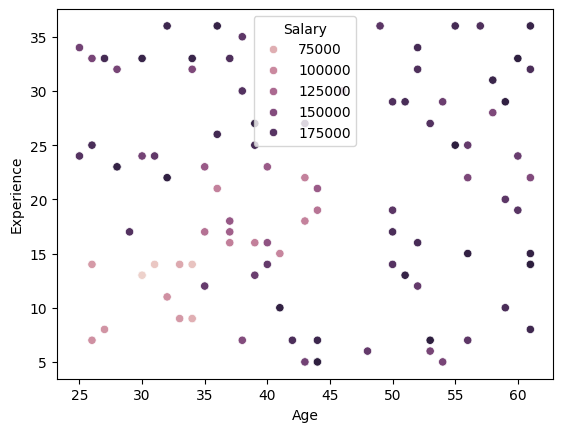

In [48]:
sns.scatterplot(x="Age",y="Experience",data=data, hue="Salary")
plt.show()

In [78]:
x = data.iloc[:,:-1]
y = data["Salary"]

In [79]:
# from sklearn.preprocessing import StandardScaler

In [80]:
# sc = StandardScaler()
# sc.fit(x)
# x = pd.DataFrame(sc.transform(x),columns=x.columns)

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=42)

In [83]:
from sklearn.neighbors import KNeighborsRegressor

In [89]:
knr = KNeighborsRegressor(n_neighbors=6)

In [90]:
knr.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=6)

In [91]:
knr.score(x_test,y_test)

0.7082665086674635

In [92]:
knr.score(x_train,y_train)

0.703957829333635

In [93]:
for i in range(1,30):
    knr1 = KNeighborsRegressor(n_neighbors=i)
    knr1.fit(x_train, y_train)
    print(knr1.score(x_test, y_test)*100, knr1.score(x_train, y_train)*100, i)

45.51814587550762 99.58293152283696 1
62.04919131269537 89.08105698837186 2
67.42166125561585 80.37765875445237 3
65.02951245598474 77.82457507396879 4
71.50456212824874 74.63698423046594 5
70.82665086674635 70.3957829333635 6
67.95529782607026 71.13809176742816 7
70.80905655304417 73.08245717800214 8
70.14916188337563 68.9175760323504 9
69.90343341457836 69.73332011277634 10
69.65430670715148 69.1251620081238 11
69.37301120861248 67.91001647054553 12
66.91887097615567 66.09210137580648 13
66.23945327562153 64.21001471389656 14
61.75178217686776 61.97447443440651 15
60.0346097037718 58.103951066340606 16
57.54971601260295 55.885365963204556 17
59.23910634727556 53.21176441372474 18
57.78546162302413 51.1471491296279 19
57.41637774334238 49.431604198454714 20
56.60066514486051 48.18807526606468 21
56.73333093383379 46.654138220016335 22
55.91843160883905 45.63352311362846 23
55.314828900186484 43.17548707971209 24
56.32108494979489 39.99174865928431 25
56.308031182638004 38.576940522027